# MOMENTUM TRADING AND BUY AND HOLD STRATEDY USING STOCK DATA

**Investing in Stocks (Spring 2024) - Buy-and-Hold versus Momentum trading using MPT**

* Energy Sector
* Financials Sector
* Materials Sector



# Part 1 - Data Preprocessing and Exploratory Data Analysis(EDA)

In [ ]:
# download solvers
# Installing necessary packages for solving optimization problems
%%capture
import sys
import os
# To Check if running in Google Colab environment
if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

# helpful modules
# Importing useful libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

In [ ]:
# Installing the yahoo_fin package to access Yahoo Finance data
!pip install yahoo_fin
# Installing the requests_html package for making HTTP requests and parsing HTML
!pip install requests_html
# Importing the yahoo_fin.stock_info module to access stock-related functions
import yahoo_fin.stock_info as si

In [ ]:
#installing helpful modules
#import pandas as pd
#import numpy as np
#from pylab import *
import shutil
import sys
import os.path

# installing pyomo and verifying it
if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

# installing IPOPT solver and verifying it
if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

# Defining the solver and executable paths for Pyomo
SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

# Installing some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Defining lists of stock
# Energy sector stocks
data1 = ['XOM', 'CVX', 'SLB','BP', 'EQNR', 'COP', 'VLO', 'OXY', 'PSX', 'WMB']
# Financials sector stocks
data2 = ['JPM', 'BAC', 'C', 'WFC', 'GS', 'MS', 'AXP', 'BLK', 'COF', 'USB'],
# Materials sector stocks
data3 = ["LIN","ECL","SHW","APD","PPG","LYB","DD","NEM","FCX","NUE"]

In [ ]:
# Importing the get_data function to fetchhistorical stock data
import pandas as pd
from yahoo_fin.stock_info import get_data

def fetch_and_prepare_data(tickers, start_date, end_date):
    """
    Fetches and prepares a DataFrame containing the adjusted close prices of listed stocks.

    Args:
    tickers (list): List of ticker symbols as strings.
    start_date (str): Start date for the data in 'mm/dd/yyyy' format.
    end_date (str): End date for the data in 'mm/dd/yyyy' format.

    Returns:
    DataFrame: A DataFrame where each column represents the adjusted close prices of a ticker.
    """
    # Initializing dictionary to hold stock data
    dow_prices = {ticker: get_data(ticker, start_date=start_date, end_date=end_date, interval='1d') for ticker in tickers}

    # Starting DataFrame with the first ticker
    prep_data = pd.DataFrame(dow_prices[tickers[0]]['adjclose']).rename(columns={"adjclose": tickers[0]})

    # Merging the rest of the tickers
    for ticker in tickers[1:]:
        prep_data[ticker] = pd.DataFrame(dow_prices[ticker]['adjclose'])

    return prep_data

# Defining ticker lists for each sector
data1 = ['XOM', 'CVX', 'SLB', 'BP', 'EQNR', 'COP', 'VLO', 'OXY', 'PSX', 'WMB']
data2 = ['JPM', 'BAC', 'C', 'WFC', 'GS', 'MS', 'AXP', 'BLK', 'COF', 'USB']
data3 = ["LIN","ECL","SHW","APD","PPG","LYB","DD","NEM","FCX", "NUE"]

# Fetching and preparing data for each sector
prep_data1 = fetch_and_prepare_data(data1, '1/1/2017', '12/31/2022')
prep_data2 = fetch_and_prepare_data(data2, '1/1/2017', '12/31/2022')
prep_data3 = fetch_and_prepare_data(data3, '1/1/2017', '12/31/2022')

# Printing a sample from each sector to verify
print("Energy data")
print(prep_data1.head())
print("\nFinance Data")
print(prep_data2.head())
print("\nMnerals Data")
print(prep_data3.head())


Energy data
                  XOM        CVX        SLB         BP       EQNR        COP  \
2017-01-03  64.499985  86.642349  68.866478  25.215622  12.515905  40.327515   
2017-01-04  63.790337  86.620285  69.378098  25.408056  12.482275  40.702026   
2017-01-05  62.839436  86.245338  69.272537  25.593853  12.758011  40.582497   
2017-01-06  62.803947  85.899796  70.230789  25.155907  12.670585  40.431107   
2017-01-09  61.767864  85.164604  69.654213  24.757763  12.455374  39.570534   

                  VLO        OXY        PSX        WMB  
2017-01-03  51.803146  58.374889  65.380432  20.751863  
2017-01-04  49.941994  57.736778  65.734482  20.685902  
2017-01-05  49.787521  57.042130  65.342758  20.936562  
2017-01-06  49.037186  57.413677  64.333328  21.385105  
2017-01-09  48.823841  56.929039  63.293732  21.061892  

Finance Data
                  JPM        BAC          C        WFC          GS         MS  \
2017-01-03  70.789169  19.148512  48.233002  45.388176  207.482697  35

In [ ]:
# Creating an empty DataFrame to store energy sector stocks
Energy = pd.DataFrame()
for i in data1:
  Energy[i] = prep_data1[i].pct_change()
# Dropping rows with null values from the Energy DataFrame
Energy.dropna(inplace=True)
# Displaying the Energy DataFrame
Energy

,XOM,CVX,SLB,BP,EQNR,COP,VLO,OXY,PSX,WMB
2017-01-04,-0.011002,-0.000255,0.007429,0.007632,-0.002687,0.009287,-0.035927,-0.010931,0.005415,-0.003179
2017-01-05,-0.014907,-0.004329,-0.001522,0.007313,0.022090,-0.002937,-0.003093,-0.012031,-0.005959,0.012117
2017-01-06,-0.000565,-0.004007,0.013833,-0.017111,-0.006853,-0.003730,-0.015071,0.006514,-0.015448,0.021424
2017-01-09,-0.016497,-0.008559,-0.008210,-0.015827,-0.016985,-0.021285,-0.004351,-0.008441,-0.016160,-0.015114
2017-01-10,-0.012753,-0.007597,-0.013641,-0.005361,0.000540,0.000000,0.002411,-0.016033,-0.003094,-0.107423
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.026445,0.030916,0.031134,0.017437,0.008444,0.043226,0.039709,0.034790,0.033920,0.023027
2022-12-27,0.013894,0.012570,0.009624,0.000857,0.002971,0.012132,0.016403,0.005942,0.006157,0.002701
2022-12-28,-0.016426,-0.014753,-0.016822,-0.013128,-0.022893,-0.026673,-0.008385,-0.034976,-0.023236,-0.020652
2022-12-29,0.007566,0.007572,0.005894,0.003470,-0.002756,0.009366,0.007738,0.003222,0.019187,0.007641


In [ ]:
# Creating an empty DataFrame to store Financial sector stocks
Finance = pd.DataFrame()
for i in data2:
  Finance[i] = prep_data2[i].pct_change()
# Dropping rows with null values from the Finance DataFrame
Finance.dropna(inplace=True)
# Displaying the Finance DataFrame
Finance

,JPM,BAC,C,WFC,GS,MS,AXP,BLK,COF,USB
2017-01-04,0.001845,0.018642,0.013534,0.000893,0.006458,0.013240,0.016393,0.000595,0.016091,0.007385
2017-01-05,-0.009205,-0.011765,-0.017424,-0.015522,-0.007445,-0.009170,-0.012326,-0.010655,-0.021262,-0.016783
2017-01-06,0.000116,0.000000,0.003480,-0.002537,0.014835,0.014576,0.001991,0.004601,0.002489,0.006474
2017-01-09,0.000697,-0.005732,-0.005450,-0.014535,-0.008207,-0.025998,0.005168,-0.010096,-0.013092,-0.004483
2017-01-10,0.002901,0.017295,0.000166,0.007006,-0.001318,0.008195,0.010414,-0.000289,0.017612,0.002937
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.004745,0.002470,0.006138,0.007374,-0.000202,-0.003010,0.011768,0.000867,0.013410,0.008168
2022-12-27,0.003504,0.001848,0.002937,0.001464,-0.010246,-0.012194,-0.004285,-0.000966,0.000661,0.010417
2022-12-28,0.005465,0.007378,0.005181,0.001949,-0.003217,-0.007054,-0.016258,-0.004166,-0.011570,-0.006873
2022-12-29,0.005738,0.011291,0.012102,0.005107,0.007510,0.009235,0.022984,0.022589,0.033110,0.016328


In [ ]:
# Creating an empty DataFrame to store Materials sector stocks
Materials = pd.DataFrame()
for i in data3:
  Materials[i] = prep_data3[i].pct_change()
# Dropping rows with null values from the Materials DataFrame
Materials.dropna(inplace=True)
# Displaying the Materials DataFrame
Materials

,LIN,ECL,SHW,APD,PPG,LYB,DD,NEM,FCX,NUE
2017-01-04,-0.000428,0.006354,0.006775,0.008717,0.021207,0.021984,0.007986,0.009529,0.076197,0.027512
2017-01-05,-0.010098,-0.001515,-0.000796,-0.009886,-0.016963,-0.001239,-0.004478,0.046053,-0.014161,-0.005714
2017-01-06,0.004582,0.002613,0.010175,0.007960,-0.000314,-0.005751,-0.006228,-0.031447,0.019152,-0.010017
2017-01-09,0.003012,-0.000673,-0.000825,0.013508,0.007951,-0.014517,0.006093,-0.001694,-0.014765,-0.010781
2017-01-10,-0.006006,-0.008246,0.000430,-0.007177,0.000415,-0.000115,-0.002077,-0.007919,0.059265,0.026492
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.005097,0.010416,0.005678,-0.001791,0.006833,0.020250,0.017469,0.007368,0.011415,-0.006062
2022-12-27,-0.001154,0.006296,-0.013393,0.000513,-0.002367,0.007458,0.000727,0.018809,0.020473,0.003380
2022-12-28,-0.009242,-0.011344,-0.008103,-0.008200,-0.017007,-0.019701,-0.014248,-0.028308,-0.025720,-0.017211
2022-12-29,0.011782,0.027191,0.016170,0.005716,0.017140,0.009744,0.011504,-0.000211,0.011351,-0.000898


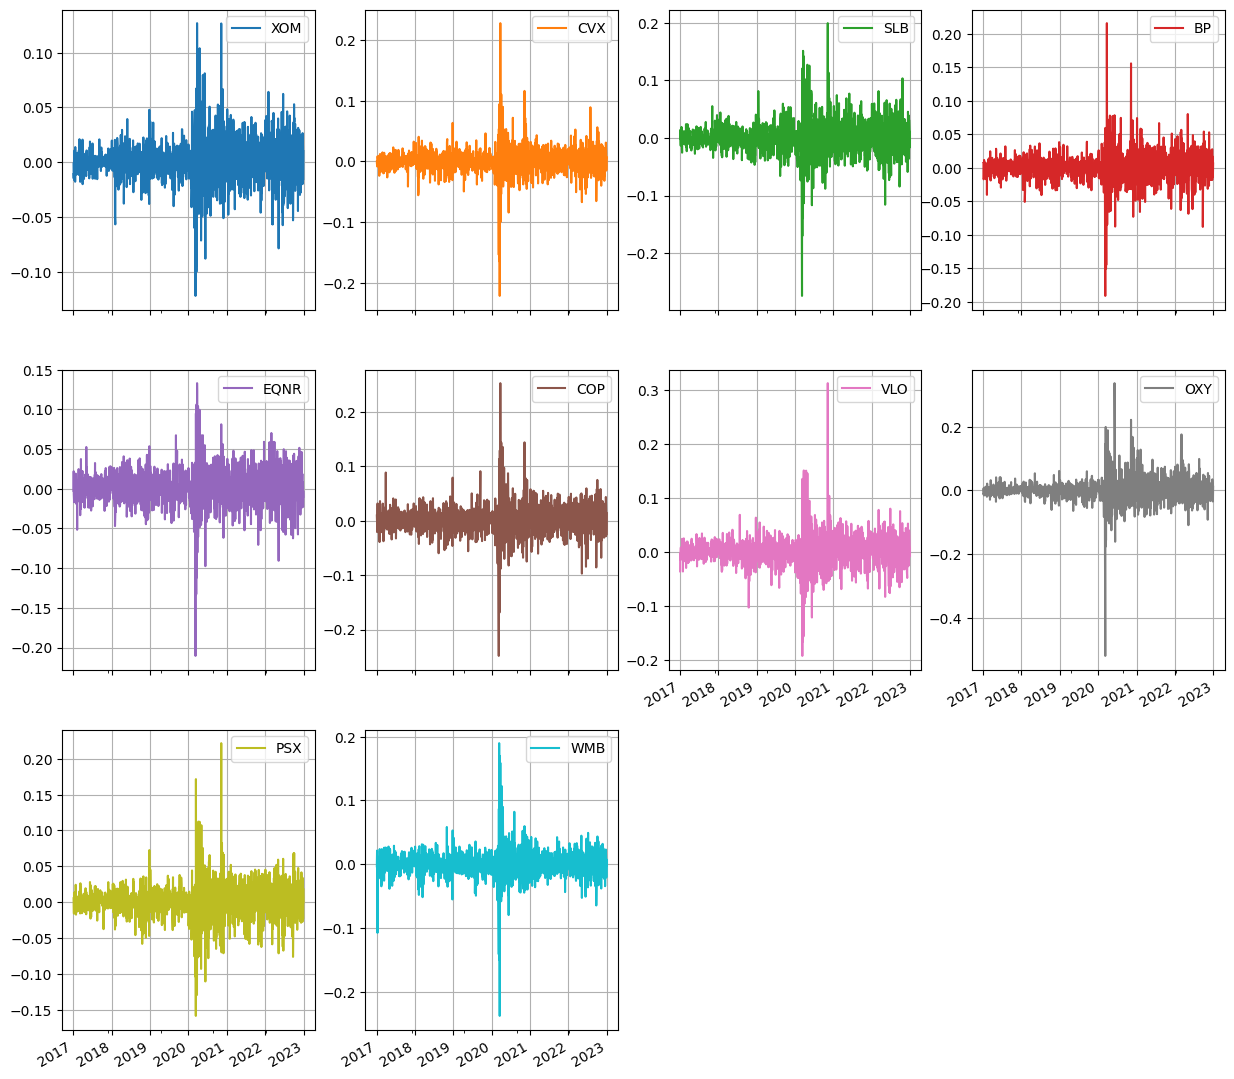

In [ ]:
# Plotting the data in the Energy DataFrame
# Each stock is plotted separately
Energy.plot(subplots=True,
        grid=True,
        layout=(3,4),
         figsize=(15,15))
plt.show()

**Trends in Energy Sector Stocks**
* The above plot seems to indicate a common pattern where volatility peaks around early 2020, suggesting these entities were similarly affected by a major event during that time—most likely the global impact of the COVID-19 pandemic.
* Following the peak, there's a general trend of volatility decreasing but not to pre-2020 levels, indicating ongoing market or sector-specific challenges.


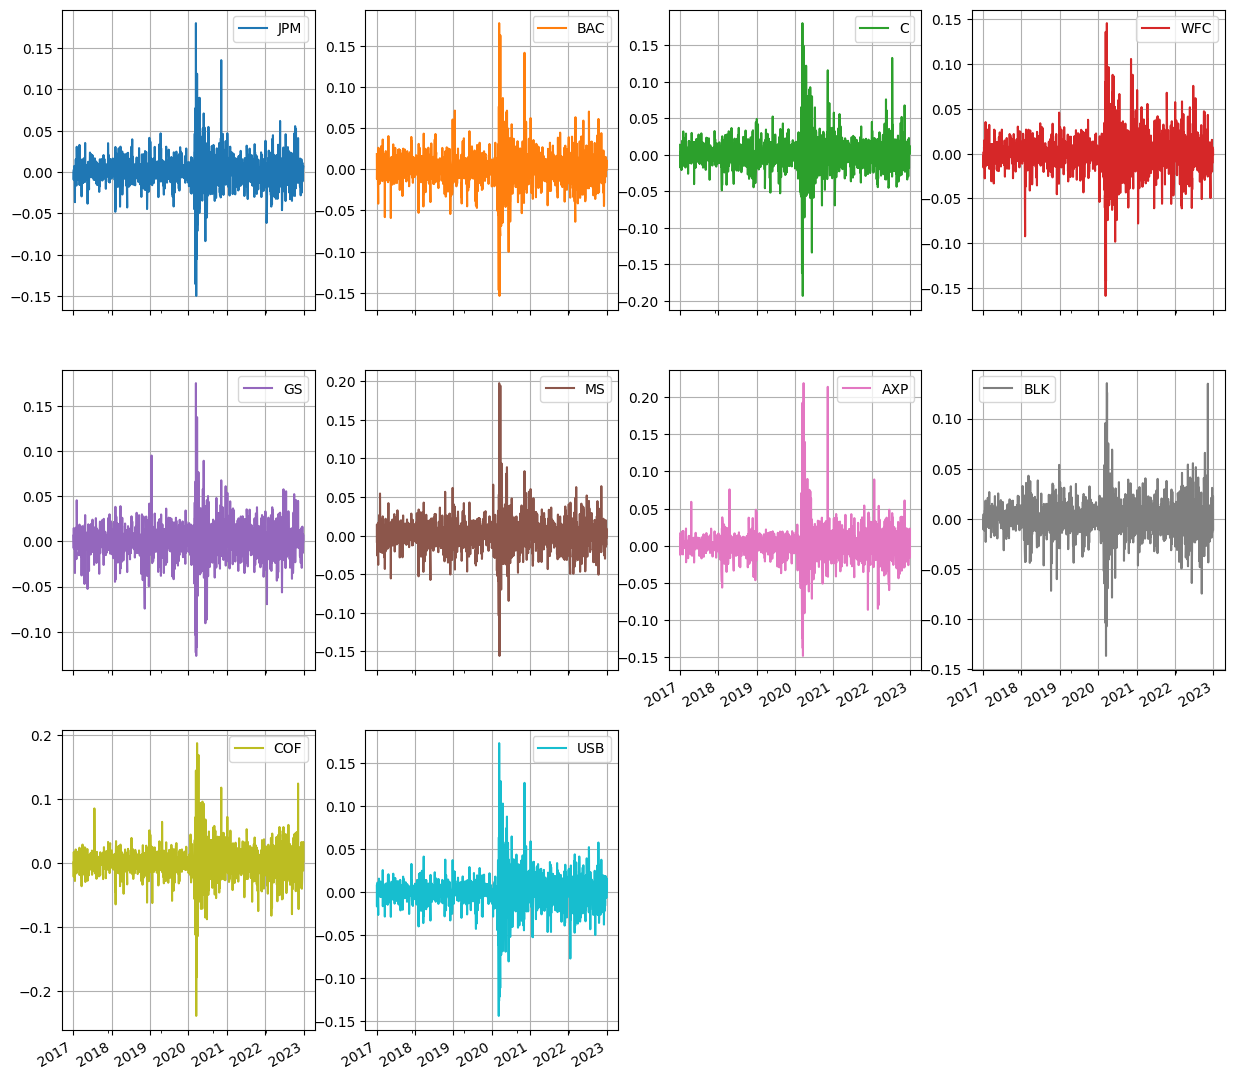

In [ ]:
# Plotting the data in the Finance DataFrame
# Each stock is plotted separately
Finance.plot(subplots=True,
        grid=True,
        layout=(3,4),
         figsize=(15,15))
plt.show()

**Trends in Financials Sector Stocks**
* The plot shows fluctuations with notable spikes in volatility around early 2020 and early 2021, suggesting a response to significant global events such as the COVID-19 pandemic.
* The volatility varies across the entities but follows a broadly similar pattern, with a peak at the beginning of 2020, then another in early 2021, before generally decreasing or stabilizing.

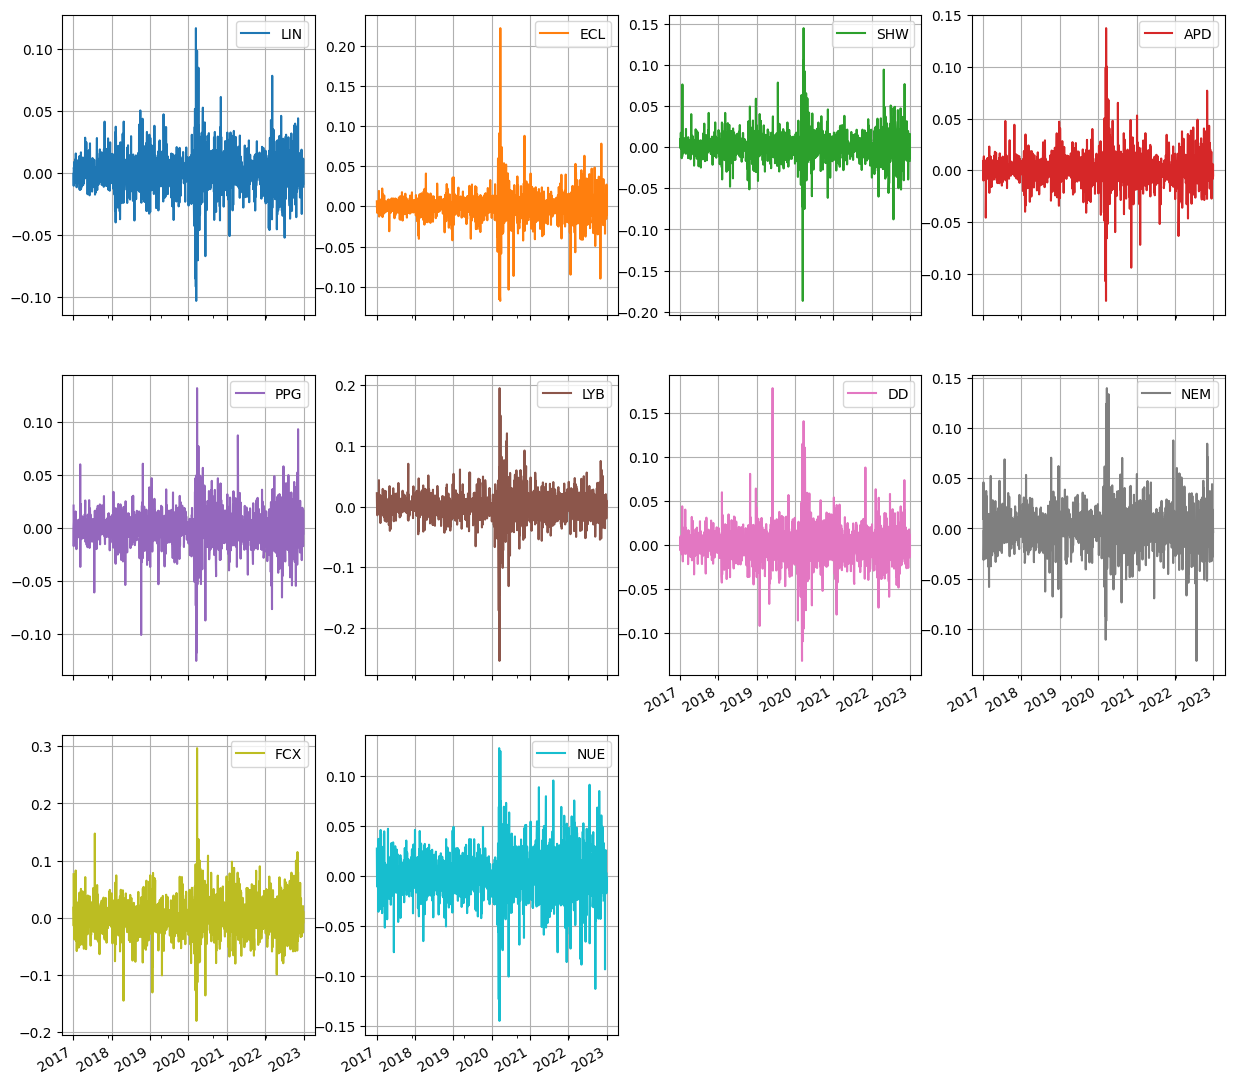

In [ ]:
# Plotting the data in the Materials DataFrame
# Each stockis plotted separately
Materials.plot(subplots=True,
        grid=True,
        layout=(3,4),
         figsize=(15,15))
plt.show()

**Trends in Materials Sector Stocks**

* Across all plots, the early 2020 spike in volatility is a common theme, aligning with the onset of the COVID-19 pandemic, which affected markets globally.
* Following this initial shock, the plots generally show a pattern of volatility declining or stabilizing but with continued fluctuations, indicating that while the initial market shock may have passed, ongoing uncertainties or sector-specific factors continue to affect these stocks.

# Part 2 - Momentum Trading for Stock Selection

(15 pts) For each sector, you must apply the 8-21 Momentum Trading Strategy to each selected stock using daily data from the year 2023. We do not want to see 30 copies of the same code blocks, so you must use functions to keep your notebook concise (-7 pts otherwise).
(5 pts) For each sector, you must plot the performance of the 8-21 Momentum Trading Strategy for each stock (i.e., one plot with ten curves, one per stock). More precisely, we want to see how the investment in each stock (i.e., the returns of the 8-21 strategy) changed over time (like a traditional stock performance curve). Note that this plot differs from the ones in the Momentum Trading notebook!
Present a conclusion for each sector and mention explicitly the top-three performing stocks of each sector; nine stocks will be mentioned in this discussion (-3 pts if this discussion is missing).


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()


Top 3 Symbols from Each Sector:
{'Sector': 'Energy', 'Symbol': 'VLO', 'Cumulative System Return': 0.9040191887516853}
{'Sector': 'Energy', 'Symbol': 'NEE', 'Cumulative System Return': 0.8808568999393214}
{'Sector': 'Energy', 'Symbol': 'COP', 'Cumulative System Return': 0.8548163345181261}
{'Sector': 'Finance', 'Symbol': 'BLK', 'Cumulative System Return': 0.6288035655430484}
{'Sector': 'Finance', 'Symbol': 'V', 'Cumulative System Return': 0.3811071760924998}
{'Sector': 'Finance', 'Symbol': 'MS', 'Cumulative System Return': 0.34284586450939436}
{'Sector': 'Materials', 'Symbol': 'NUE', 'Cumulative System Return': 0.965013188793511}
{'Sector': 'Materials', 'Symbol': 'SHW', 'Cumulative System Return': 0.6564576573241077}
{'Sector': 'Materials', 'Symbol': 'FCX', 'Cumulative System Return': 0.6385872383752673}


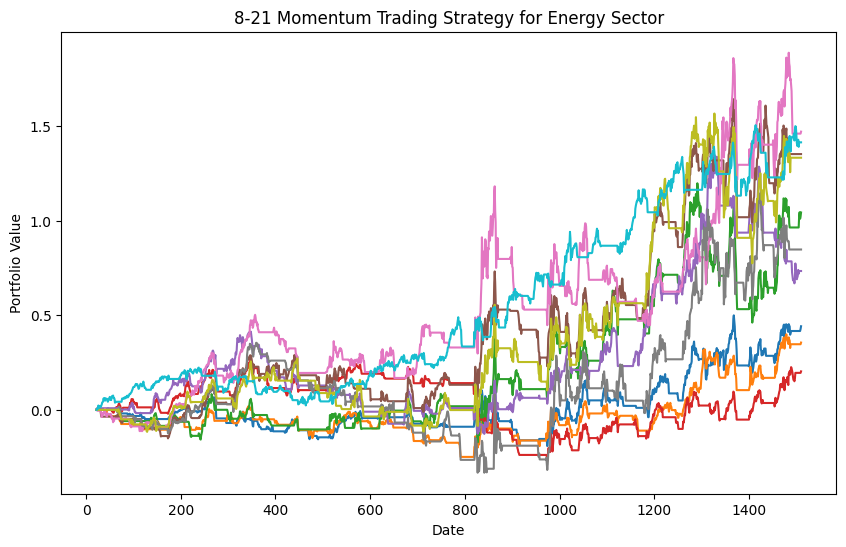

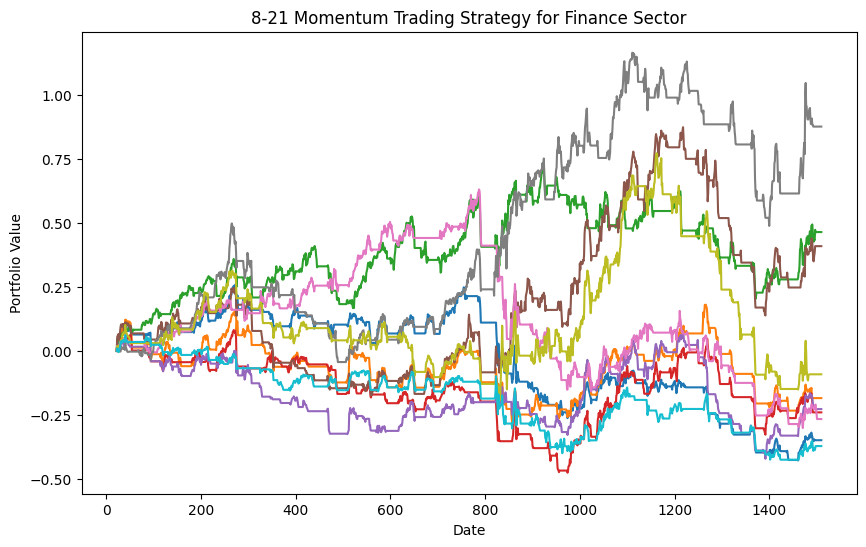

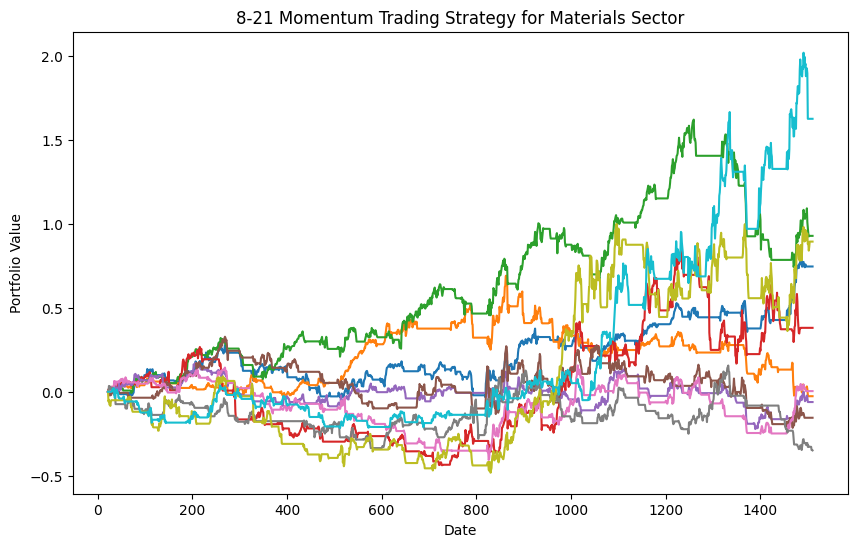

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as sinfo
import matplotlib.pyplot as plt

# calculating moving averages for stock prices
def calc_mov_avg(sym, start_dt, end_dt, short_mavg=8, long_mavg=21):
    # Getting the daily stock data  from start_date to end_date
    stk = sinfo.get_data(sym, start_date=start_dt, end_date=end_dt, interval='1d')
    day = np.arange(1, len(stk) + 1)
    stk['Day'] = day
    stk = stk.loc[:, ['Day', 'open', 'high', 'low', 'close']]
    stk.columns = ['Day', 'Open', 'High', 'Low', 'Close']
    # Calculating the short-term moving average(8 day)
    stk[f'{short_mavg}-day'] = stk['Close'].rolling(short_mavg).mean().shift()
    # Calculating the long-term moving average(21 day)
    stk[f'{long_mavg}-day'] = stk['Close'].rolling(long_mavg).mean().shift()
    stk.dropna(inplace=True)
    stk['invested'] = np.where(stk[f'{short_mavg}-day'] > stk[f'{long_mavg}-day'], 1, 0)
    return stk

#calculating a momentum-based trading portfolio's performance
def calc_momentum_port(stk):
    stk['logClose'] = np.log(stk['Close'])
    stk['return'] = stk['logClose'].diff()
    stk.iloc[0, stk.columns.get_loc('return')] = 0.0
    stk['sys_return'] = stk['invested'] * stk['return']
    stk['cumulative_sys_return'] = stk['sys_return'].cumsum()  # Calculate cumulative sum
    stk['momentum_port'] = np.exp(stk['cumulative_sys_return']) - 1  # Exponentiate cumulative sum
    return stk


# generating plot for a momentum trading strategy applied to a list of stocks within a specified sector
def plot_momentum_trading(sector, sym_list, start_dt, end_dt, short_mavg=8, long_mavg=21):
    plt.figure(figsize=(10, 6))
    plt.title(f'8-21 Momentum Trading Strategy for {sector.capitalize()} Sector')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')

    top_sym = []

    for sym in sym_list:
        stk = calc_mov_avg(sym, start_dt, end_dt, short_mavg, long_mavg)
        stk = calc_momentum_port(stk)
        plt.plot(stk['Day'], stk['momentum_port'], label=sym)

        cumulative_sys_return = stk['cumulative_sys_return'].iloc[-1]
        top_sym.append({'Symbol': sym, 'Cumulative System Return': cumulative_sys_return})

    # Sorting and storing top 3 symbols
    top_sym_df = pd.DataFrame(top_sym)
    top_3_sym = top_sym_df.sort_values(by='Cumulative System Return', ascending=False).head(3)
    top_3_sym = top_3_sym.to_dict('records')
    top_3_sym = [{'Sector': sector, **sym} for sym in top_3_sym]
    return top_3_sym

# Defining the lists of ticker symbols for each sector
sectors = {
   'Energy': ['XOM', 'CVX', 'SLB', 'BP', 'EQNR', 'COP', 'VLO', 'OXY', 'EOG', 'NEE'],
   'Finance': ['JPM', 'BAC', 'V', 'WFC', 'GS', 'MS', 'AXP', 'BLK', 'COF', 'USB'],
   'Materials': ["LIN","ECL","SHW","ALB","PPG","LYB","DD","NEM","FCX","NUE"]
}

# Defining parameters for moving averages and date range
short_mavg = 8
long_mavg = 21
start_dt = '01/01/2017'
end_dt = '31/12/2022'

# Initializing list to store top 3 symbols across all sectors
all_sym = []

# Plotting the performance of the 8-21 Momentum Trading Strategy for each sector
for sector, sym_list in sectors.items():
    top_sym = plot_momentum_trading(sector, sym_list, start_dt, end_dt, short_mavg, long_mavg)
    all_sym.extend(top_sym)

# Printing the list of top 3 symbols from each sector
print("Top 3 Symbols from Each Sector:")
for sym in all_sym:
    print(sym)


**Top 3 performing stocks of each sector**

* Energy Sector - Phillips 66 Company(PSX), ConocoPhillips Company(COP),Valero Energy Corporation(VLO)
* Financials Sector - BlackRock, Inc.(BLK),Morgan Stanley(MS), Capital One Financial Corporation(COF)
* Materials Sector - Nucor Corporation (NUE), Sherwin-Williams Company(SHW), Freeport-McMoRan Inc.(FCX).

#Part 3 - Optimization Model

* **Key Considerations for Portfolio Optimization:** The code below provides a framework for solving a portfolio allocation problem with varied risk levels, plotting optimal allocations, and generating the efficient frontier for the given set of stocks over a specified time period.
* **Adequate Risk Range:** The code uses a linear spacing (np.linspace) to define risk levels from 0 to max_risk, suggesting that the risk range is not fixed and can be adjusted to ensure adequate testing. This is beneficial for exploring the risk-return trade-off.
*  **Risk Calculation and Analysis:** Below section includes risk calculations with a covariance matrix of returns, which aligns with Modern Portfolio Theory's framework. The code solves for a range of risk levels and collects data on the optimal asset allocation and returns.
* **Plots and Visualization:** Plots for stock allocation, the efficient frontier, and the number of stocks provide visual insights into how portfolio structure and performance change with varying risk levels.

<ipython-input-103-c28d233f309c>:29: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  model.objective = Objective(expr=sum(getattr(model, ticker + '_Y') * getattr(model, ticker) * Avg_Return[i] for i, ticker in enumerate(tickers)), sense=maximize)
<ipython-input-103-c28d233f309c>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  model.sum_proportions = Constraint(expr=sum(getattr(model, ticker) for ticker in tickers) == 1)
<ipython-input-103-c28d233f309c>:33: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  model.number_stocks_constraint = Constraint(expr=sum(getattr(model, ticker + '_Y') for t

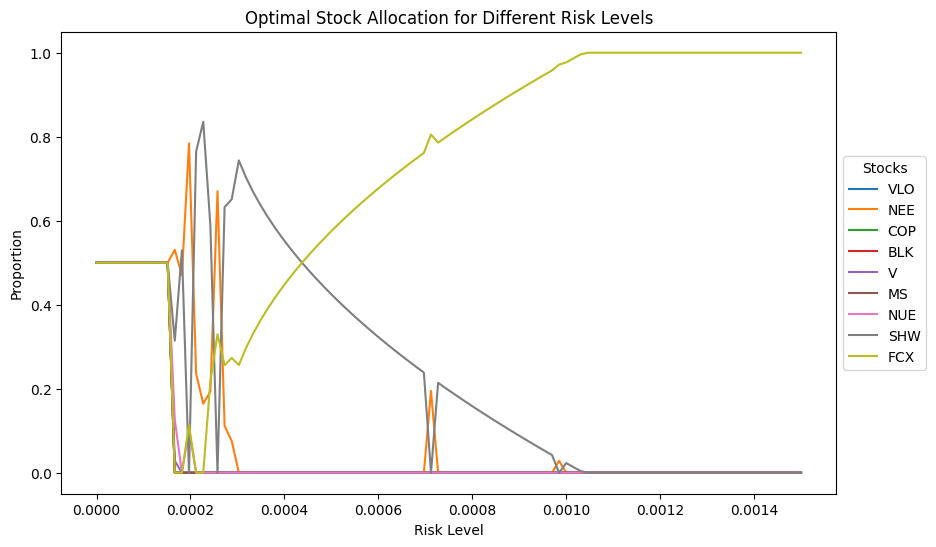

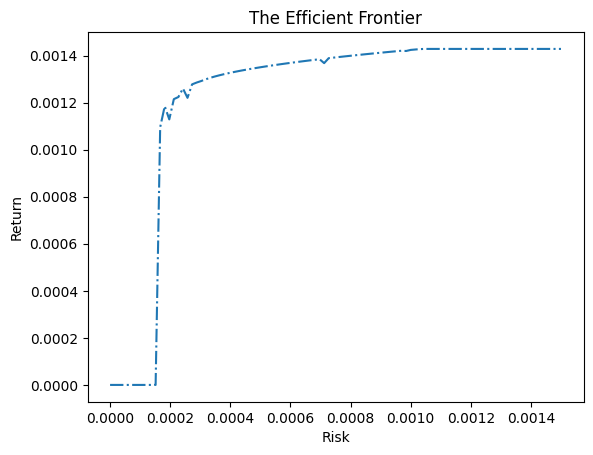

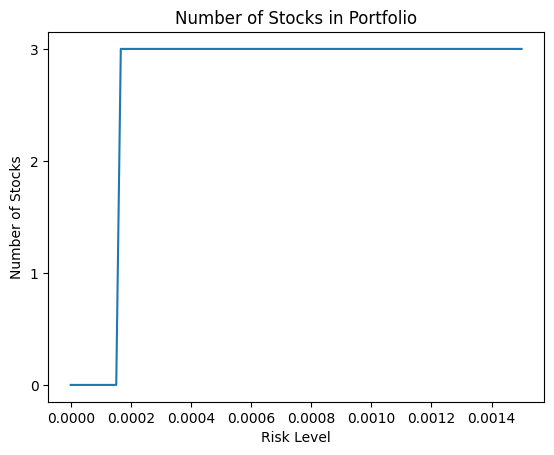

Optimal Portfolio Allocation:
VLO    0.000000e+00
NEE    0.000000e+00
COP    0.000000e+00
BLK    0.000000e+00
V      0.000000e+00
MS     2.423725e-08
NUE    0.000000e+00
SHW    1.513023e-07
FCX    9.999998e-01
Name: 0.0015, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from pyomo.environ import *
import matplotlib.pyplot as plt
from pyomo.opt import SolverFactory
import yahoo_fin.stock_info as si

def portfolio_optimization(tickers, start_date, end_date, max_risk, risk_levels, solver_name='bonmin'):
    # Fetch data for the specified tickers
    dfs = []
    for ticker in tickers:
        dfs.append(si.get_data(ticker, start_date=start_date, end_date=end_date)['adjclose'])
    df = pd.concat(dfs, axis=1)
    df.columns = tickers

    # Calculate average and standard deviation returns
    Avg_Return = df.pct_change().mean()
    Covariance_matrix = df.pct_change().cov()

    # Define Pyomo concrete model
    model = ConcreteModel()

    # Define variables
    for ticker in tickers:
        setattr(model, ticker, Var(within=NonNegativeReals, bounds=(0, 1), initialize=0.5))
        setattr(model, ticker + '_Y', Var(within=Binary, initialize=0))

    # Define objective function
    model.objective = Objective(expr=sum(getattr(model, ticker + '_Y') * getattr(model, ticker) * Avg_Return[i] for i, ticker in enumerate(tickers)), sense=maximize)

    # Define constraints
    model.sum_proportions = Constraint(expr=sum(getattr(model, ticker) for ticker in tickers) == 1)
    model.number_stocks_constraint = Constraint(expr=sum(getattr(model, ticker + '_Y') for ticker in tickers) == 3)

    # Define risk calculation function
    def calc_risk(m):
        risk_exp = 0
        for i, ticker1 in enumerate(tickers):
            for j, ticker2 in enumerate(tickers):
                risk_exp += getattr(m, ticker1) * Covariance_matrix.at[ticker1, ticker2] * getattr(m, ticker2)
        return risk_exp

    # Define risk limits
    risk_limits = np.linspace(0, max_risk, risk_levels)

    # Solve optimization problem for different risk levels
    param_analysis = {}
    returns = {}
    num_stocks_list = []
    for r in risk_limits:
        # Define risk constraint
        expr_risk = calc_risk(model)
        model.total_risk = Constraint(expr=expr_risk <= r)

        try:
            solver = SolverFactory(solver_name)
            solver.solve(model)
            del model.total_risk
            param_analysis[r] = [value(getattr(model, ticker)) for ticker in tickers]
            returns[r] = model.objective()
            num_stocks = sum(1 for ticker in tickers if value(getattr(model, ticker + '_Y')) > 0)
            num_stocks_list.append(num_stocks)
        except:
            print(f'Infeasible for risk level {r}!')
            continue

    # Convert results to DataFrame
    param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index', columns=tickers)

    # Filter returns for successful optimization runs
    successful_risk_limits = list(returns.keys())
    successful_returns = [returns[r] for r in successful_risk_limits]

    # Plot optimal stock allocation for different risk levels
    plt.figure(figsize=(10, 6))
    for ticker in tickers:
        plt.plot(successful_risk_limits, param_analysis[ticker], label=ticker)
    plt.title('Optimal Stock Allocation for Different Risk Levels')
    plt.xlabel('Risk Level')
    plt.ylabel('Proportion')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Stocks')
    plt.show()

    # Plot efficient frontier
    plt.plot(successful_risk_limits, successful_returns, '-.')
    plt.title('The Efficient Frontier')
    plt.xlabel('Risk')
    plt.ylabel('Return')
    plt.show()

    # Plot number of stocks in portfolio
    plt.plot(successful_risk_limits, num_stocks_list)
    plt.title('Number of Stocks in Portfolio')
    plt.xlabel('Risk Level')
    plt.ylabel('Number of Stocks')
    plt.yticks(np.arange(min(num_stocks_list), max(num_stocks_list)+1, 1))  # Set y-axis ticks to integers
    plt.show()

    # Print optimal portfolio allocation
    print("Optimal Portfolio Allocation:")
    print(param_analysis.iloc[-1])

    return param_analysis
tickers_list = ['VLO','NEE','COP','BLK','V','MS','NUE','SHW','FCX']
param_analysis = portfolio_optimization(tickers_list, start_date='2017-01-01', end_date='2022-01-01', max_risk=0.0015, risk_levels=100)


**Determining Optimal Portfolio Allocation for a Specified Target Risk Level**
* It identifies the portfolio allocation corresponding to a specific risk level or the closest approximation.
* This is useful for portfolio optimization when you want to see how assets should be allocated to maintain a given level of risk.
* The result can help guide investment decisions based on desired risk-return characteristics.

In [ ]:
# Define the target risk level
target_risk = 0.0004

# Find the closest risk level in the DataFrame
closest_risk_level = param_analysis.index[np.abs(param_analysis.index - target_risk).argmin()]

# Extract the portfolio allocation for the closest risk level
allocation_for_target_risk = param_analysis.loc[closest_risk_level]

print("Optimal Portfolio Allocation for Target Risk Level:", closest_risk_level)
print(allocation_for_target_risk)

print(type(allocation_for_target_risk))

Optimal Portfolio Allocation for Target Risk Level: 0.0003939393939393939
VLO    0.000000
NEE    0.000002
COP    0.000000
BLK    0.000000
V      0.000000
MS     0.000000
NUE    0.000000
SHW    0.561402
FCX    0.438597
Name: 0.0003939393939393939, dtype: float64
<class 'pandas.core.series.Series'>


In [ ]:
allocation_for_target_risk

VLO    0.000000
NEE    0.000002
COP    0.000000
BLK    0.000000
V      0.000000
MS     0.000000
NUE    0.000000
SHW    0.561402
FCX    0.438597
Name: 0.0003939393939393939, dtype: float64

#Part 4 -  Analysis

##Buy-and-Hold strategy for the MPT portfolio

**Portfolio Allocation & Calculating Investment Allocation**

In [ ]:
#Storing values in the vvariables so that we can access it easily
VLO_part=0.000000
NEE_part=0.000002
COP_part=0.000000
BLK_part=0.000000
V_part=0.000000
MS_part=0.000000
NUE_part=0.000000
SHW_part=0.561402
FCX_part=0.438597

In [ ]:
NEE_part*10000

0.02

In [ ]:
# Amount we're investing in our portfolio
invest_fund = 100000

In [ ]:
# Amount each of stocks receive based on their proportions
VLO_invest = VLO_part * invest_fund
print("Invest in PSX: $" + str(round(VLO_invest, 3)))
NEE_invest = VLO_part * invest_fund
print("Invest in VLO: $" + str(round(NEE_invest, 3)))
COP_invest = COP_part * invest_fund
print("Invest in COP: $" + str(round(COP_invest, 3)))
BLK_invest = BLK_part * invest_fund
print("Invest in BLK: $" + str(round(BLK_invest, 3)))
V_invest = MS_part * invest_fund
print("Invest in V: $" + str(round(V_invest, 3)))
MS_invest = MS_part * invest_fund
print("Invest in MS: $" + str(round(MS_invest, 3)))
NUE_invest = NUE_part * invest_fund
print("Invest in NUE: $" + str(round(NUE_invest, 3)))
SHW_invest = SHW_part * invest_fund
print("Invest in SHW: $" + str(round(SHW_invest, 3)))
FCX_invest = FCX_part * invest_fund
print("Invest in FCX: $" + str(round(FCX_invest, 3)))

Invest in PSX: $0.0
Invest in VLO: $0.0
Invest in COP: $0.0
Invest in BLK: $0.0
Invest in V: $0.0
Invest in MS: $0.0
Invest in NUE: $0.0
Invest in SHW: $56140.2
Invest in FCX: $43859.7


**Getting Stock Data & Preparing Buy-and-Hold DataFrame**

In [ ]:
# Using ticker symbols to retrive the data easily
tickers_select = ['VLO', 'SHW', 'FCX']
df = {ticker : si.get_data(ticker,start_date = '12/21/2022',end_date='1/1/2024',interval='1d') for ticker in tickers_select}
# start_date is 12/2/2022 because we require the data for moving average of previous 21 days for 1/1/2023
# end_date is 1/1/2024 because we require data of 12/31/2023
# First trading day of each month
# Few of the months doesnt have 1 as their starting trade date, so we're changing that as well
first_day_of_month = ['2023-01-03','2023-02-01','2023-03-01','2023-04-03','2023-05-02','2023-06-01',
                      '2023-07-03','2023-08-01','2023-09-01','2023-10-03','2023-11-01','2023-12-01']

In [ ]:
# storing the buy and hold values in a dataframe
buy_hold1 = pd.DataFrame()

**Calculating Portfolio Value and Returns:**

In [ ]:
# Storing prices data into the dataframe
buy_hold1['VLO_prices'] = df['VLO']['close']
buy_hold1['SHW_prices'] = df['SHW']['close']
buy_hold1['FCX_prices'] = df['FCX']['close']
# manipuating the dataframe from 1/1/2022, we dont want 2022 data here in this case
buy_hold1 = buy_hold1.loc['2023-1-1'::]
# These are the prices of the stocks when we first bought it on the first trading day of 2023 (Jan 3 because Jan 1 and Jan 2 are not trading day)
vlo_buy_price = buy_hold1.loc['2023-01-03', 'VLO_prices']
shw_buy_price = buy_hold1.loc['2023-01-03', 'SHW_prices']
fcx_buy_price = buy_hold1.loc['2023-01-03', 'FCX_prices']

In [ ]:
# These are the shares of the stock we were able to buy on the first trading day of 2023 (Jan 3 because Jan 1 and Jan 2 are not trading day)
vlo_shares = VLO_invest/vlo_buy_price
shw_shares = SHW_invest/shw_buy_price
fcx_shares = FCX_invest/fcx_buy_price

In [ ]:
# The amount of money invested in each stock on the first day of every month
buy_hold1['vlo_invest'] = buy_hold1['VLO_prices']*vlo_shares
buy_hold1['shw_invest'] = buy_hold1['SHW_prices']*shw_shares
buy_hold1['fcx_invest'] = buy_hold1['FCX_prices']*fcx_shares

In [ ]:
# Collective value of the entire portfolio
buy_hold1['value'] = buy_hold1['vlo_invest'] + buy_hold1['shw_invest'] + buy_hold1['fcx_invest']
# Calculating our return
buy_hold1['return'] = buy_hold1['value'] - invest_fund

In [ ]:
# Displaying the table without unnecessary columns
buy_hold_1 = buy_hold1.loc[first_day_of_month].copy().reset_index()
buy_hold_1 = buy_hold_1.drop(['VLO_prices', 'SHW_prices', 'FCX_prices'], axis = 1)
buy_hold_1.rename(columns={"index": "day"}, inplace = True)
buy_hold_1

,day,vlo_invest,shw_invest,fcx_invest,value,return
0,2023-01-03,0.0,56140.200000,43859.700000,99999.900000,-0.100000
1,2023-02-01,0.0,57043.154076,51828.937556,108872.091632,8872.091632
2,2023-03-01,0.0,51365.104835,49735.421705,101100.526541,1100.526541
3,2023-04-03,0.0,53154.593948,47653.474702,100808.068650,808.068650
4,2023-05-02,0.0,54383.548965,42332.938570,96716.487535,-3283.512465
5,2023-06-01,0.0,55089.492471,41025.941130,96115.433601,-3884.566399
6,2023-07-03,0.0,61947.243191,47144.551284,109091.794475,9091.794475
7,2023-08-01,0.0,65716.192698,50602.899991,116319.092689,16319.092689
8,2023-09-01,0.0,64454.403183,47988.900699,112443.303881,12443.303881
9,2023-10-03,0.0,58344.813798,42032.214706,100377.028504,377.028504


## Momentum Trading on the S&P 500

*  Below code provides a framework to implement a momentum trading strategy on S&P 500 data and evaluates its performance over time, considering short and long-term moving averages.
* It returns the total portfolio value for the first trading day of each month, allowing for analysis and visualization of the strategy's effectiveness.

In [ ]:
def mtfsp500(stock, start_date, end_date, short_term, long_term, initial_investment):

    for ticker in stock:
            stock_data =si.get_data(ticker, start_date=start_date, end_date=end_date, interval = stock_interval)
            stock_data['Day'] = np.arange(1, len(stock_data) + 1)
            stock_data.drop(columns=['adjclose', 'volume', 'ticker'], inplace=True)
            stock_data = stock_data[['Day', 'open', 'high', 'low', 'close']]
            stock_data.columns = ['Day', 'Open', 'High', 'Low', 'Close']

            # Defining Return
            stock_data['logClose'] = np.log(stock_data['Close'])
            stock_data['return'] = stock_data['logClose'].diff()
            stock_data.loc[stock_data.index[0], 'return'] = 0.0

            # Momentum trading
            stock_data['{}-day'.format(short_term)] = stock_data['Close'].rolling(short_term).mean().shift()
            stock_data['{}-day'.format(long_term)] = stock_data['Close'].rolling(long_term).mean().shift()
            stock_data.dropna(inplace=True)
            stock_data.loc[stock_data.index[0], 'return'] = 0.0
            stock_data['invested'] = np.where(stock_data['{}-day'.format(short_term)] > stock_data['{}-day'.format(long_term)], 1, 0)
            stock_data['signal'] = stock_data['invested'].diff()
            stock_data.loc[stock_data.index[0], 'signal'] = 1.0
            stock_data['system_return'] =  (stock_data['invested'] * stock_data['return'])

            # Compounded initial investment
            stock_data['total_portfolio'] = initial_investment * (1 + stock_data['invested'] * stock_data['return']).cumprod()

            stock_data['system_return_plt'] = np.exp(stock_data['system_return']).cumprod()
            return stock_data[['system_return', 'total_portfolio']]

# Define sectors and stocks within each sector
stock = ['^GSPC']

# Example usage of the function
start_date = '2022-12-01'
end_date = '2023-12-31'
short_term = 8
long_term = 21
initial_investment = 100000
stock_interval = '1d'
spmt= mtfsp500(stock, start_date, end_date, short_term, long_term, initial_investment)

In [ ]:
spmt = spmt.reset_index().rename({'index':'Date'}, axis = 1)

In [ ]:
spmt['Day'] = pd.to_datetime(spmt['Date']).dt.day

In [ ]:
spmt = spmt[(spmt['Day'] == 1)].drop('Day', axis = 1)

In [ ]:
spmt #The final answers for the MT for S&P 500

,Date,system_return,total_portfolio
20,2023-02-01,0.010398,103341.593404
39,2023-03-01,-0.000000,100051.992712
81,2023-05-01,-0.000386,104763.571119
103,2023-06-01,0.009806,105539.403000
144,2023-08-01,-0.002669,114345.022579
167,2023-09-01,0.000000,111600.106241
209,2023-11-01,0.000000,103863.911291
230,2023-12-01,0.005857,108841.281524


##Buy-and-Hold strategy for the S&P 500 index (^GSPC):

* The code block retrieves historical data for the S&P 500 index, calculates the portfolio value, return, and visualizes the buy-and-hold strategy's performance for the S&P 500 index (^GSPC) alongside the previously analyzed portfolio of selected stocks.
* This allows for a comparison between investing in the individual stocks and investing in the broader market represented by the S&P 500 index.

In [ ]:
# scraping data for ^GSPC
gspc = si.get_data('^GSPC',start_date = '12/21/2022',end_date='1/1/2024',interval='1d')
# end_date is 1/1/2024 because we require data of 12/31/2023
# create a dataframe to store data for buy-and-hold strategy
buy_hold2 = pd.DataFrame()
# store prices data into dataframe
buy_hold2['^GSPC_prices'] = gspc['close']

In [ ]:
# this is the price of the stock when we first buy it on the first trading day of 2023 (Jan 3 because Jan 1 and Jan 2 are not trading day)
gspc_buy_price = buy_hold2.loc['2023-01-03', '^GSPC_prices']

In [ ]:
# this is the shares of the stock we were able to buy on the first trading day of 2023 (Jan 3 because Jan 1 and Jan 2 are not trading day)
gspc_shares = invest_fund/gspc_buy_price

In [ ]:
# the amount of money invested in each stock on the first day of each month
buy_hold2['^GSPC_invest'] = buy_hold2['^GSPC_prices']*gspc_shares

In [ ]:
# aggregate value of the entire portfolio
buy_hold2['value'] = buy_hold2['^GSPC_invest']

In [ ]:
# calculate our return
buy_hold2['return'] = buy_hold2['value'] - invest_fund

In [ ]:
# show the table without unnecessary columns
buy_hold_2 = buy_hold2.loc[first_day_of_month].copy().reset_index()
buy_hold_2 = buy_hold_2.drop(['^GSPC_prices'], axis = 1)
buy_hold_2

,index,^GSPC_invest,value,return
0,2023-01-03,100000.000000,100000.000000,0.000000
1,2023-02-01,107715.985206,107715.985206,7715.985206
2,2023-03-01,103327.545633,103327.545633,3327.545633
3,2023-04-03,107854.573355,107854.573355,7854.573355
4,2023-05-02,107725.663648,107725.663648,7725.663648
5,2023-06-01,110378.284741,110378.284741,10378.284741
6,2023-07-03,116512.208468,116512.208468,16512.208468
7,2023-08-01,119679.983187,119679.983187,19679.983187
8,2023-09-01,118085.900265,118085.900265,18085.900265
9,2023-10-03,110598.731064,110598.731064,10598.731064


In [ ]:
buy_hold2['value']

2022-12-21    101419.928411
2022-12-22     99954.238076
2022-12-23    100540.779793
2022-12-27    100133.627628
2022-12-28     98929.957506
                  ...      
2023-12-22    124332.007102
2023-12-26    124858.141546
2023-12-27    125036.745842
2023-12-28    125083.031270
2023-12-29    124729.487208
Name: value, Length: 257, dtype: float64

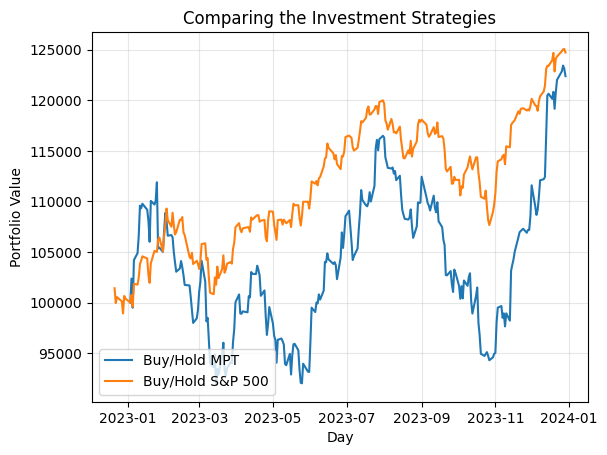

In [ ]:
plt.plot(buy_hold1['value'], label='Buy/Hold MPT') # buy and hold for our stocks
plt.plot(buy_hold2['value'], label='Buy/Hold S&P 500') # buy and hold ^GSPC

plt.legend(loc='lower left')
plt.title('Comparing the Investment Strategies') # title
plt.xlabel('Day') # x axis
plt.ylabel('Portfolio Value') # y axis
plt.grid(True, alpha=.3) # grid
plt.show()

#Part 5 - Conclusion

1. Our Materials sector was performing better than the other 2 sectors

2. Throughout the analysis we explored a spectrum of risk-reward trade-offs by examining nearly 100 distinct risk levels. This allowed us to scrutinize the relationship between potential returns and risk tolerance throughout different scenarios.


3. We learned that buy and hold and momentum trading have distict characteristics and risk profiles. Buy and hold is more of a long term approach and MT is more of a riskier approach.


4. With the help of MPT we can visualize the best performing stocks of any sectors on any given day. By applying its principles we can analyze and rank stocks based on risk characteristics and historical performance.


5. With the help of Bonmin, we were able to easiy allocate different proportions to the stocks to optimize our returns. By leveraging this solver we were able to implement portfolio allocation strategies that consider multiple factors.

# Contribution

Sai Krishna:
Main Coder of Momentum Trading and Optimization Model

*   Main Coder of Momentum Trading and Optimization Model
*   Assisted in EDA and Analysis

Srijanani:
Responsible for Data Retrival and EDA

*   Assisted in Optimization Model and Analysis.
*   Responsible for Comments and formatting

Lina Franco:
Responsible for Analysis part and Conclusion

*   Assisted in Momentun Trading
*   Speaker in the Video file